importing dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import files
uploaded = files.upload()

Saving top10K-TMDB-movies.csv to top10K-TMDB-movies.csv


In [4]:
dataset = pd.read_csv('top10K-TMDB-movies.csv')

In [5]:
dataset.head()

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811


In [6]:
dataset.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [8]:
dataset.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [9]:
from collections import Counter

# Split genres and count occurrences
genre_list = dataset['genre'].dropna().str.split(',').sum()
genre_counts = Counter(genre_list)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by="Count", ascending=False)


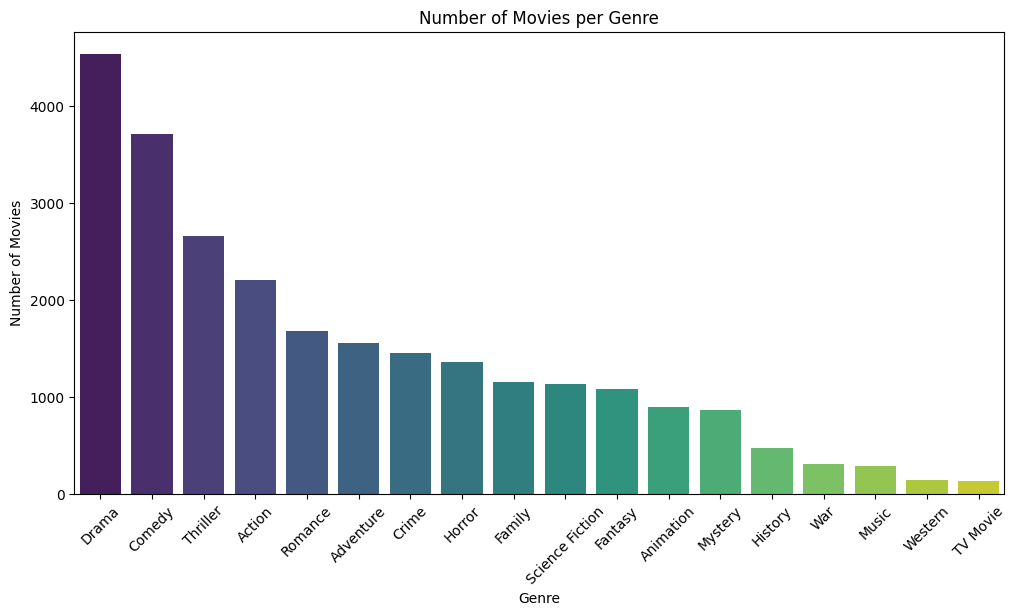

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_df['Genre'], y=genre_df['Count'], palette="viridis")

plt.xticks(rotation=45)
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")

plt.show()


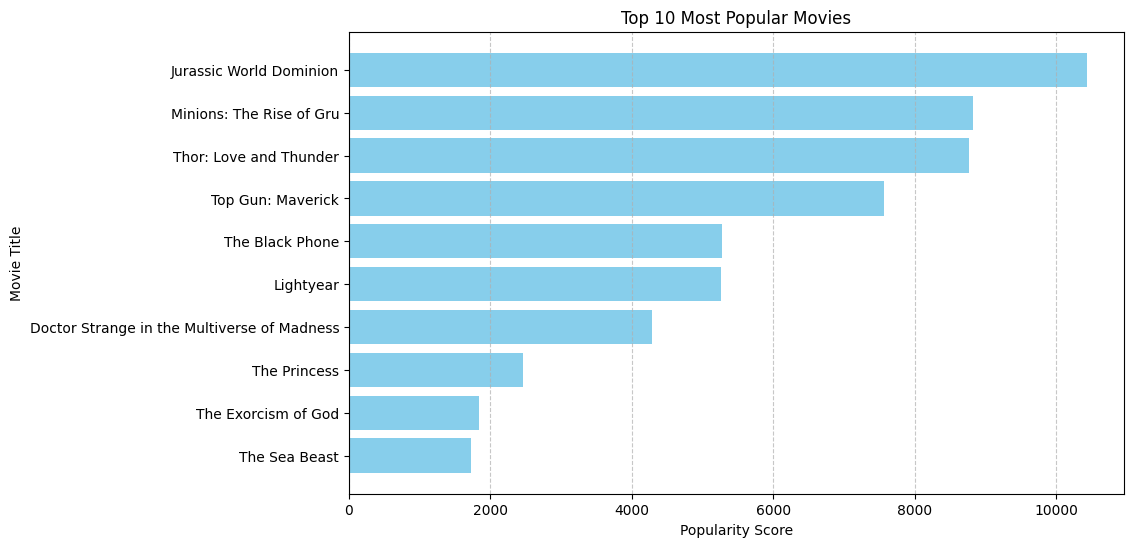

In [11]:
top_movies = dataset.sort_values(by='popularity', ascending=False).head(10)

# Plot top 10 most popular movies
plt.figure(figsize=(10, 6))
plt.barh(top_movies['title'][::-1], top_movies['popularity'][::-1], color='skyblue')
plt.xlabel("Popularity Score")
plt.ylabel("Movie Title")
plt.title("Top 10 Most Popular Movies")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

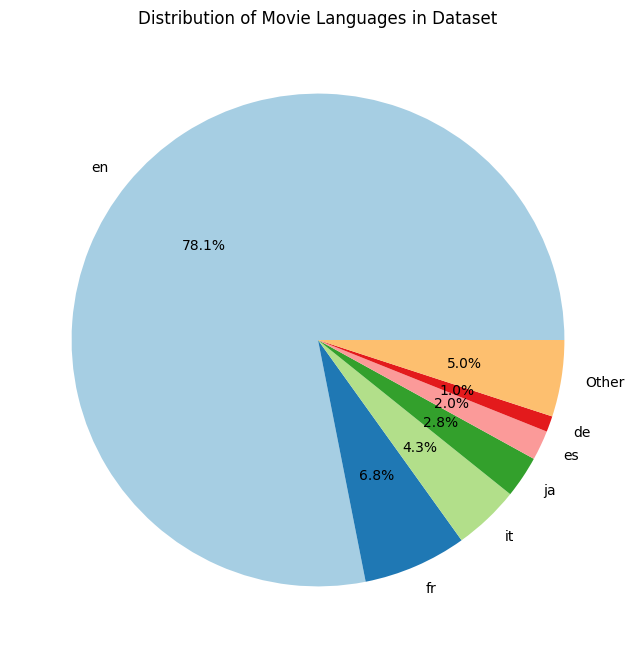

In [12]:
plt.figure(figsize=(8, 8))
language_counts = dataset['original_language'].value_counts()

threshold = 0.01 * language_counts.sum()
filtered_languages = language_counts[language_counts >= threshold]
other_languages = language_counts[language_counts < threshold].sum()

if other_languages > 0:
    filtered_languages['Other'] = other_languages

plt.pie(filtered_languages, labels=filtered_languages.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors)
plt.title("Distribution of Movie Languages in Dataset")
plt.show()

In [13]:
movies = dataset[['id','title','overview','genre']]

In [14]:
movies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [15]:
movies['tags'] = movies['overview'] + movies['genre']

In [16]:
movies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [17]:
movies = movies.drop(columns = ['overview','genre'])

In [18]:
movies

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv=CountVectorizer(max_features=10000,stop_words='english')

In [21]:
vector = cv.fit_transform(movies['tags'].values.astype('U')).toarray()


In [22]:
vector.shape

(10000, 10000)

In [23]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)

In [24]:
similarity

array([[1.        , 0.05634362, 0.13041013, ..., 0.07559289, 0.11065667,
        0.06900656],
       [0.05634362, 1.        , 0.07715167, ..., 0.        , 0.03636965,
        0.        ],
       [0.13041013, 0.07715167, 1.        , ..., 0.02300219, 0.0673435 ,
        0.09449112],
       ...,
       [0.07559289, 0.        , 0.02300219, ..., 1.        , 0.03253   ,
        0.03042903],
       [0.11065667, 0.03636965, 0.0673435 , ..., 0.03253   , 1.        ,
        0.04454354],
       [0.06900656, 0.        , 0.09449112, ..., 0.03042903, 0.04454354,
        1.        ]])

In [25]:
distance = sorted([(i,v) for i,v in enumerate(similarity[2])], key=lambda vector:vector[1], reverse=True)
for i in distance[0:6]:
  print(i)

(2, np.float64(1.0000000000000004))
(4, np.float64(0.4763305116224667))
(7419, np.float64(0.35634832254989923))
(153, np.float64(0.33946736991660215))
(2624, np.float64(0.32732683535398854))
(9520, np.float64(0.31497039417435607))


In [26]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[1:6]:
    print(movies.iloc[i[0]].title)


The Godfather: Part II
Blood Ties
Joker
Bomb City
Gotti


In [29]:
import requests

def fetch_poster(movie_id):
    api_key = "a8abfb3c5921b6bcccfe73461ee405a5"  # Replace with your actual TMDB API key
    url = f"https://api.themoviedb.org/3/movie/{movie_id}?api_key={api_key}&language=en-US"

    response = requests.get(url)
    data = response.json()

    if "poster_path" in data and data["poster_path"]:
        return "https://image.tmdb.org/t/p/w500" + data["poster_path"]
    return None

In [30]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def recommend(movie):
    if movie not in movies['title'].values:
        return [], []

    index = movies[movies['title'] == movie].index[0]
    distances = sorted(enumerate(similarity[index]), key=lambda x: x[1], reverse=True)

    recommended_movie_names = []
    recommended_movie_posters = []

    for i in distances[1:6]:
      movie_id = movies.iloc[i[0]].get('id', None)
      recommended_movie_names.append(movies.iloc[i[0]]['title'])

      if movie_id:
        poster_url = fetch_poster(movie_id)
        print(f"Fetching poster for {movies.iloc[i[0]]['title']}: {poster_url}")  # Debugging step

        if poster_url:
            try:
                response = requests.get(poster_url)
                img = Image.open(BytesIO(response.content))
                recommended_movie_posters.append(img)
            except Exception as e:
                print(f"Error fetching image: {e}")
                recommended_movie_posters.append(None)
        else:
            recommended_movie_posters.append(None)
    else:
        recommended_movie_posters.append(None)


    # Display recommendations using Matplotlib
    plt.figure(figsize=(15, 5))
    for idx, (name, poster) in enumerate(zip(recommended_movie_names, recommended_movie_posters)):
        plt.subplot(1, 6, idx + 1)
        if poster:
            plt.imshow(poster)  # Now it's a valid PIL image
        plt.axis("off")
        plt.title(name, fontsize=10)

    plt.show()

    return recommended_movie_names, recommended_movie_posters

Fetching poster for The Godfather: Part II: https://image.tmdb.org/t/p/w500/hek3koDUyRQk7FIhPXsa6mT2Zc3.jpg
Fetching poster for Blood Ties: https://image.tmdb.org/t/p/w500/7tMuywiZUoaAihEIkCu3BAL1xPC.jpg
Fetching poster for Joker: https://image.tmdb.org/t/p/w500/udDclJoHjfjb8Ekgsd4FDteOkCU.jpg
Fetching poster for Bomb City: https://image.tmdb.org/t/p/w500/kho48mWJ5xuiLn5bpuIvO6ZP7ep.jpg
Fetching poster for Gotti: https://image.tmdb.org/t/p/w500/cUCX6B0FGTsHC5D8L2CF0gJrQCm.jpg


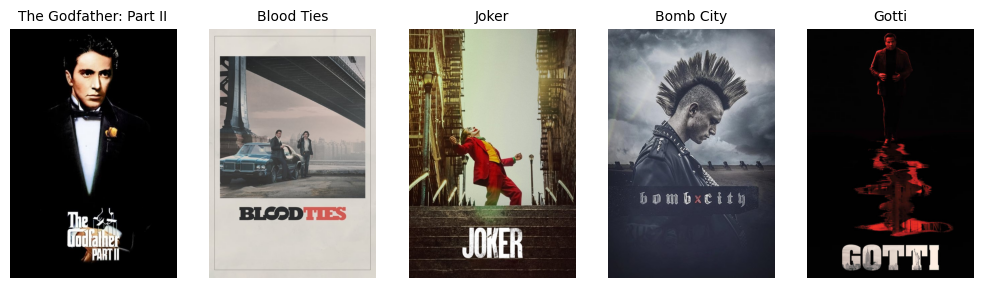

(['The Godfather: Part II', 'Blood Ties', 'Joker', 'Bomb City', 'Gotti'],
 [<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750>,
  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x750>,
  None])

In [31]:
recommend('The Godfather')

In [ ]:
import pickle

In [ ]:
pickle.dump(movies,open('movies_list.pkl','wb'))

In [ ]:
pickle.dump(similarity,open('similarity.pkl','wb'))

In [ ]:
pickle.load(open('movies_list.pkl','rb'))

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
